# Gradient Boosting Classifier on DARKNET 2020: A Project Report

In [3]:
#importing python libraries
import numpy as np
import pandas as pd

In [4]:
#Reading the dataset: Darknet 2020
df = pd.read_csv('darknet.csv', error_bad_lines=False)
df.columns = df.columns.str.strip()
df.head(10)

b'Skipping line 328: expected 85 fields, saw 125\n'


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
5,10.152.152.11-173.194.65.127-54570-443-6,10.152.152.11,54570,173.194.65.127,443,6,24/07/2015 04:10:00 PM,421362,5,3,...,0,0,0,0,1.437765e+15,1.866111e+05,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
6,173.194.33.97-10.152.152.11-443-56254-6,173.194.33.97,443,10.152.152.11,56254,6,24/07/2015 04:09:45 PM,119682119,488,487,...,0,0,0,0,1.437765e+15,3.184630e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
7,10.152.152.11-216.58.216.142-57361-443-6,10.152.152.11,57361,216.58.216.142,443,6,24/07/2015 04:09:46 PM,116996934,369,378,...,0,0,0,0,1.437765e+15,3.617028e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
8,74.125.28.189-10.152.152.11-443-44097-6,74.125.28.189,443,10.152.152.11,44097,6,24/07/2015 04:09:48 PM,100279453,61,60,...,0,0,0,0,1.437765e+15,3.327790e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
9,10.152.152.11-173.194.65.127-34702-19305-6,10.152.152.11,34702,173.194.65.127,19305,6,24/07/2015 04:10:00 PM,119962833,3638,3157,...,0,0,0,0,1.437765e+15,3.298254e+07,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [5]:
#A look at all the 85 columns of the dataset
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [6]:
#Getting all the columns with total number of entries in each column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [7]:
#Correlation matrix to know the dependency of columns on each other
corr = df.corr()
corr.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Src Port,1.000000,-0.246451,-0.097384,0.065328,-0.036259,-0.014248,-0.019712,-0.008271,0.076486,-0.090022,...,-0.028619,0.138354,NaN,NaN,NaN,NaN,0.073311,0.058631,0.077870,0.031325
Dst Port,-0.246451,1.000000,-0.321199,0.039227,0.022094,0.014775,0.004451,0.010865,0.004448,-0.178715,...,0.014722,0.246275,NaN,NaN,NaN,NaN,0.069794,-0.000706,0.064385,0.060121
Protocol,-0.097384,-0.321199,1.000000,-0.266954,-0.034735,-0.026164,-0.023039,-0.020874,-0.195123,0.564044,...,-0.023370,-0.872467,NaN,NaN,NaN,NaN,-0.222855,-0.155843,-0.236588,-0.129431
Flow Duration,0.065328,0.039227,-0.266954,1.000000,0.142110,0.100288,0.072529,0.057008,0.340744,-0.068930,...,0.145455,0.240411,NaN,NaN,NaN,NaN,0.505336,0.127573,0.506074,0.409007
Total Fwd Packet,-0.036259,0.022094,-0.034735,0.142110,1.000000,0.744834,0.457391,0.635688,0.125575,-0.020982,...,0.698507,0.029652,NaN,NaN,NaN,NaN,0.066400,-0.017736,0.062264,0.074038


In [8]:
df.dropna() #dropping null values

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [9]:
df.isnull().sum().head() #to check the number of null values in each column

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
dtype: int64

In [10]:
df['Label'].value_counts()  #to check the number of classes in Label

Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

In [11]:
df['Label.1'].value_counts() #to check the number of classes in Label

P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label.1, dtype: int64

In [12]:
#splitting the Src IP into octets,getting first two ocets
newIP = []
for value in df['Src IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]
#     print(octet2)
    newIP.append(float(octet1 + '.' + octet2))

    

In [13]:
df1 = pd.DataFrame(newIP)  #a new dataframe with the above obtained series
df1.head()

,0
0,10.152
1,10.152
2,10.152
3,10.152
4,10.152


In [14]:
df['Src IP'] = df1  #replacing column Src IP with df1
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [15]:
newIP1 = [] #splitting the Dst IP into octets,getting first two ocets
for value in df['Dst IP']:
    IP = value.split(".")
    octet1= IP[0]
    octet2= IP[1]
    
#     print(octet2)
    newIP1.append(float(octet1 + '.' + octet2))

In [16]:
df2 = pd.DataFrame(newIP1)
df2.head()

,0
0,216.580
1,216.580
2,216.580
3,74.125
4,173.194


In [17]:
df['Dst IP'] = df2
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [18]:
# label encoding the data : Label and Label.1
from sklearn.preprocessing import LabelEncoder 
  
Le = LabelEncoder() 
  
df['Label']= Le.fit_transform(df['Label'])
df['Label.1']= Le.fit_transform(df['Label.1'])


In [19]:
df.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152,57158,216.580,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,10.152.152.11-216.58.220.99-57159-443-6,10.152,57159,216.580,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,10.152.152.11-216.58.220.99-57160-443-6,10.152,57160,216.580,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
3,10.152.152.11-74.125.136.120-49134-443-6,10.152,49134,74.125,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152,34697,173.194,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,0,0


In [20]:
df5=df.drop(['Flow ID','Timestamp'], axis = 1) #dropping the unnecessary columns
df5.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,0,0




In the next 4 steps, i will be performing some operations on the below columns to convert it from exponential values to normal float values.



In [21]:
df5['Idle Mean']=df5['Idle Mean']/1e15

In [22]:
df5['Idle Max']=df5['Idle Max']/1e15

In [23]:
df5['Idle Min']=df5['Idle Min']/1e15

In [24]:
df5['Idle Std']=df5['Idle Std']/1e7

In [25]:
df5.head(5)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437765,0.311772,1.437765,1.437765,0,0


In [26]:
df5.isnull().values.any() 

True

In [27]:
df5.fillna(df5.mean()).head(5) #filling null values with the mean of the column

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158,216.580,443,6,229,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
1,10.152,57159,216.580,443,6,407,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
2,10.152,57160,216.580,443,6,431,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
3,10.152,49134,74.125,443,6,359,1,1,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0
4,10.152,34697,173.194,19305,6,10778451,591,400,64530,6659,...,0,0,0,0,1.437765,0.311772,1.437765,1.437765,0,0


In [28]:
df5.notnull().values.all() #this shows there are no more null values



False

In [29]:
df5=df5.astype(float)

In [30]:
# Replacing infinite with nan 
df5.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df5.dropna(inplace=True) 

In [31]:
df5.head(5)


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152,57158.0,216.580,443.0,6.0,229.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,10.152,57159.0,216.580,443.0,6.0,407.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,10.152,57160.0,216.580,443.0,6.0,431.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,10.152,49134.0,74.125,443.0,6.0,359.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,10.152,34697.0,173.194,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,...,0.0,0.0,0.0,0.0,1.437765,0.311772,1.437765,1.437765,0.0,0.0


In [32]:
df5['Label'].value_counts()

0.0    93309
1.0    23861
3.0    22919
2.0     1392
Name: Label, dtype: int64

So the data is highly imbalanced.....


Now I will undersample class 0.0 wrt class 1.0 and
oversample class 3.0 wrt class 2.0


In [33]:
#1. Find the number of the minority class
non_tor = len(df5[df5['Label']==0])
non_vpn = len(df5[df5['Label']==1])
vpn = len(df5[df5['Label']==2])
tor = len(df5[df5['Label']==3])

print(non_tor)
print(non_vpn)
print(vpn)
print(tor)

93309
23861
1392
22919


In [34]:
index_non_tor = df5[df5['Label']==0].index
index_non_vpn = df5[df5['Label']==1].index
index_tor = df5[df5['Label']==2].index
index_vpn = df5[df5['Label']==3].index

In [35]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_non_tor,non_vpn,replace='False')

In [36]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_non_vpn,random_indices])

In [37]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = df5.iloc[under_sample_indices]
under_sample_df.head()


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
93403,131.202,64717.0,131.202,13000.0,6.0,81.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0
93404,131.202,42530.0,178.237,443.0,6.0,119829241.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982862e-08,1.0,3.0
93405,131.202,42534.0,178.237,443.0,6.0,119828205.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982767e-08,1.0,3.0
93406,131.202,17208.0,77.720,11113.0,17.0,138272.0,2.0,2.0,126.0,85.0,...,0.0,0.0,0.0,0.0,1.430326,9.762882e-03,1.430326,1.430326e+00,1.0,3.0
93407,8.600,0.0,8.000,0.0,0.0,5103.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0


In [38]:
under_sample_df['Label'].value_counts()

0.0    23844
1.0    23829
2.0       49
Name: Label, dtype: int64

In [39]:
vpn_sample = df5[df5['Label']==2].sample(tor, replace=True)

In [40]:
#create a new dataframe containing only tor data
df_tor = df5[df5['Label']==3]

In [41]:
over_sample_df = pd.concat([vpn_sample,df_tor], axis=0)

In [42]:
over_sample_class_counts=pd.value_counts(over_sample_df['Label'])

In [43]:
over_sample_class_counts

3.0    22919
2.0    22919
Name: Label, dtype: int64

In [44]:
balance_df = pd.concat([under_sample_df,over_sample_df], axis=0)


In [45]:
balance_df['Label'].value_counts()

0.0    23844
1.0    23829
2.0    22968
3.0    22919
Name: Label, dtype: int64

In [46]:
balance_df.head()


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
93403,131.202,64717.0,131.202,13000.0,6.0,81.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0
93404,131.202,42530.0,178.237,443.0,6.0,119829241.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982862e-08,1.0,3.0
93405,131.202,42534.0,178.237,443.0,6.0,119828205.0,5.0,3.0,24.0,0.0,...,0.0,0.0,0.0,0.0,1.225994,5.406124e+07,1.430326,2.982767e-08,1.0,3.0
93406,131.202,17208.0,77.720,11113.0,17.0,138272.0,2.0,2.0,126.0,85.0,...,0.0,0.0,0.0,0.0,1.430326,9.762882e-03,1.430326,1.430326e+00,1.0,3.0
93407,8.600,0.0,8.000,0.0,0.0,5103.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,3.0


In [47]:
balance_df = balance_df[(balance_df.Label != 1) & (balance_df.Label != 2)]
balance_df.head()


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
11843,10.152,52821.0,75.101,80.0,6.0,169.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.0
45842,10.152,48048.0,84.184,51413.0,6.0,108261126.0,22.0,21.0,2759.0,1015.0,...,0.0,0.0,0.0,0.0,1.456324,4.342617,1.456324,1.456324,0.0,7.0
27962,72.210,80.0,10.152,41215.0,6.0,12.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.0
17523,198.470,80.0,10.152,46087.0,6.0,12.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.0
56313,10.152,36208.0,2.153,64585.0,6.0,100112248.0,12.0,11.0,3175.0,2839.0,...,0.0,0.0,0.0,0.0,1.456328,3.147024,1.456328,1.456328,0.0,7.0


In [48]:
balance_df.shape

(46763, 83)

In [49]:
#Forming a new dataframe for the target variable and removing it from the above dataset.
target = balance_df.filter(['Label'], axis=1)
target.head()

,Label
11843,0.0
45842,0.0
27962,0.0
17523,0.0
56313,0.0


In [50]:
balance_df = balance_df.drop('Label', 1)
balance_df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
11843,10.152,52821.0,75.101,80.0,6.0,169.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.0
45842,10.152,48048.0,84.184,51413.0,6.0,108261126.0,22.0,21.0,2759.0,1015.0,...,20.0,0.0,0.0,0.0,0.0,1.456324,4.342617,1.456324,1.456324,7.0
27962,72.210,80.0,10.152,41215.0,6.0,12.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.0
17523,198.470,80.0,10.152,46087.0,6.0,12.0,1.0,1.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.0
56313,10.152,36208.0,2.153,64585.0,6.0,100112248.0,12.0,11.0,3175.0,2839.0,...,20.0,0.0,0.0,0.0,0.0,1.456328,3.147024,1.456328,1.456328,7.0


In [51]:
#MinMaxScaling

import pandas as pd
from sklearn import preprocessing

x = balance_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_final = pd.DataFrame(x_scaled,columns = balance_df.columns)
df_final.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
0,0.039486,0.806034,0.291103,0.001221,0.352941,1.400000e-06,0.000000,0.000012,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.222222
1,0.039486,0.733199,0.326845,0.784512,0.352941,9.021761e-01,0.000400,0.000260,0.000036,0.000010,...,0.454545,0.0,0.0,0.0,0.0,0.999936,4.216806e-08,0.999936,0.999936,0.777778
2,0.319153,0.001221,0.035533,0.628901,0.352941,9.166667e-08,0.000000,0.000012,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.222222
3,0.888148,0.001221,0.035533,0.703243,0.352941,9.166667e-08,0.000000,0.000012,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.222222
4,0.039486,0.552524,0.004057,0.985504,0.352941,8.342687e-01,0.000209,0.000136,0.000042,0.000027,...,0.454545,0.0,0.0,0.0,0.0,0.999939,3.055851e-08,0.999939,0.999939,0.777778


In [52]:
#DOING THE TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# split into train test sets
y=target
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32734, 82) (14029, 82) (32734, 1) (14029, 1)


In [53]:
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (X_train, X_test))

train: [[7.91190000e+01 6.02050000e+04 1.01520000e+01 ... 0.00000000e+00
  0.00000000e+00 7.00000000e+00]
 [1.08000000e+01 4.93780000e+04 8.80000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.00000000e+00]
 [1.01520000e+01 9.10000000e+03 6.68700000e+01 ... 1.45632528e+00
  1.45632528e+00 7.00000000e+00]
 ...
 [1.01520000e+01 4.21810000e+04 2.17160000e+02 ... 0.00000000e+00
  0.00000000e+00 2.00000000e+00]
 [1.08000000e+01 2.14810000e+04 1.98700000e+02 ... 0.00000000e+00
  0.00000000e+00 3.00000000e+00]
 [1.01520000e+01 4.94020000e+04 1.01520000e+01 ... 1.45625246e+00
  1.45625246e+00 2.00000000e+00]], test: [[1.08000000e+01 6.14530000e+04 1.31202000e+02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.01520000e+01 3.47360000e+04 1.49202000e+02 ... 0.00000000e+00
  0.00000000e+00 7.00000000e+00]
 [1.01520000e+01 3.99910000e+04 2.12900000e+02 ... 1.45632321e+00
  1.45632321e+00 7.00000000e+00]
 ...
 [1.01520000e+01 5.17850000e+04 2.17238000e+02 ... 1.45632363e+00
  1.45632353e+00 7

C:\Users\kshitij\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [54]:
#FIRST I AM RUNNING WITHOUT HYPERPARAMETERE TUNING|

In [55]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [56]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

C:\Users\kshitij\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [58]:
#NOW I NEED TO DO HYPER PARAMATER TUNING OF ADABOOST
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100]
grid['learning_rate'] = [ 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\kshitij\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: 0.999990 using {'learning_rate': 1.0, 'n_estimators': 50}
0.935297 (0.003438) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.935297 (0.003438) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.935297 (0.003438) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.935297 (0.003438) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.997393 (0.001209) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.999012 (0.000539) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.996894 (0.001202) with: {'learning_rate': 1.0, 'n_estimators': 10}
0.999990 (0.000055) with: {'learning_rate': 1.0, 'n_estimators': 50}
0.999990 (0.000055) with: {'learning_rate': 1.0, 'n_estimators': 100}


In [74]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1. 1.]
recall: [1. 1.]
fscore: [1. 1.]
support: [7094 6935]


In [75]:
from sklearn.metrics import confusion_matrix
df_con = confusion_matrix(y_test, y_pred)

In [76]:
df_con

array([[7094,    0],
       [   0, 6935]], dtype=int64)

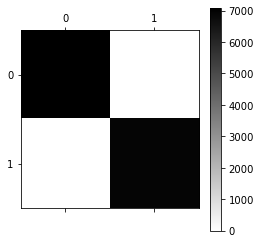

In [77]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_con, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_con, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()


plot_confusion_matrix(df_con)

# LET US SEE THE ROC CURVE

In [71]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

C:\Users\kshitij\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [78]:
#DOING THE TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# split into train test sets
y=target
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32734, 82) (14029, 82) (32734, 1) (14029, 1)


[0.         0.96113125 0.96548223 0.98346628 0.9853517  0.99071791
 0.99158811 0.99347353 0.99405366 0.99492386 0.99535896 0.99666425
 0.99709935 0.99767948 0.99782451 0.99825961 0.99854967 0.99898477
 0.9995649  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.80347631e-04 5.60695262e-04 7.00869078e-04 1.12139052e-03
 1.26156434e-03 1.82225960e-03 2.38295486e-03 2.52312868e-03
 4.20521447e-03 4.90608354e-03 6.72834315e-03 9.39164564e-03
 1.56994673e-02 1.59798150e-02 3.65853659e-02 3.67255397e-02
 1.00000000e+00]
[2.     1.     0.9995 0.98   0.9795 0.96   

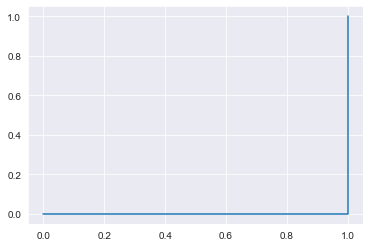

In [95]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
print(fpr)
print(tpr)
print(thresholds)
# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

In [98]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print('auc_score for baseline model is:',auc_score1)

auc_score for baseline model is: 1.0
